In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/02ng/Task2-SearchTask/AllQuantifiedPeptides.tsv', sep='\t')

In [3]:
df.columns

Index(['Sequence', 'Base Sequence', 'Protein Groups', 'Gene Names', 'Organism',
       'Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib',
       'Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib',
       'Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib',
       'Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib',
       'Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib',
       'Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib',
       'Detection Type_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib',
       'Detection Type_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib',
       'Detection Type_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib',
       'Detection Type_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib',
       'Detection Type_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib',
       'Detection Type_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib', 'Unnamed: 17'],
      dtype='object')

In [4]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [5]:
df_peptide_notshared = df[~df['Protein Groups'].str.contains(';')]
df_peptide_notshared 

df_peptide_shared = df[df['Protein Groups'].str.contains(';')]
df_peptide_shared

df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')
# df_peptide_shared[['Gene Names', 'gene_split']]

#expand the rows. the concat onto other df
df2_pep_shared = df_peptide_shared.explode('gene_split').reset_index(drop=True)
df2_pep_shared['Gene Names'] = df2_pep_shared['Gene Names'].str.split(';').str[0]
df2_pep_shared = df2_pep_shared[df2_pep_shared['gene_split'] != ""] #without this line protein that have the format AAX; are added twice

df_combined = pd.concat([df_peptide_notshared, df2_pep_shared])
df_combined

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_45803/226859099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib,Detection Type_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib,Detection Type_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib,Detection Type_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib,Detection Type_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib,Detection Type_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib,Detection Type_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib,Unnamed: 17,gene_split
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,0.000000,0.000000,11000.391546,6858.943153,0.000000,0.000000,NotDetected,NotDetected,MSMS,MBR,NotDetected,NotDetected,NaN,NaN
1,AAAAAAAKM[Common Variable:Oxidation on M]DGKESK,AAAAAAAKMDGKESK,Q9NYV4,CDK12,Homo sapiens,0.000000,0.000000,10631.583372,7739.976429,0.000000,0.000000,NotDetected,NotDetected,MBR,MSMS,NotDetected,NotDetected,NaN,NaN
2,AAAAAAALQAK,AAAAAAALQAK,P36578,RPL4,Homo sapiens,117684.917969,129031.098048,46195.730583,53556.075772,49265.722434,66364.496478,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,NaN
3,AAAAADLANR,AAAAADLANR,O76031,CLPX,Homo sapiens,11577.657841,0.000000,0.000000,0.000000,0.000000,0.000000,MSMS,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,NaN
4,AAAEDVNVTFEDQQK,AAAEDVNVTFEDQQK,Q9NQP4,PFDN4,Homo sapiens,10213.544154,10692.679149,0.000000,0.000000,13240.955154,7370.631535,MSMS,MSMS,NotDetected,NotDetected,MBR,MBR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,YTQVGPDHNR,YTQVGPDHNR,Q08211;UNDEFINED,DHX9,Homo sapiens;,19545.152832,22579.931675,10783.123548,9404.400834,5168.985887,10364.836435,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,DHX9
2595,YVPLADVK,YVPLADVK,P42167;UNDEFINED,TMPO,Homo sapiens;,13335.779111,11511.688188,8718.013053,8812.305660,8517.674292,9091.229913,MSMS,MSMS,MSMS,MBR,MBR,MBR,NaN,TMPO
2597,YYITIIDAPGHR,YYITIIDAPGHR,Q05639;UNDEFINED,EEF1A2,Homo sapiens;,5473.087156,5028.052734,9770.699834,6445.882194,10016.686091,7238.955835,MSMS,MSMS,MSMS,MBR,MBR,MBR,NaN,EEF1A2
2599,YYPTEDVPRK,YYPTEDVPRK,Q02878;UNDEFINED,RPL6,Homo sapiens;,24073.791667,29948.978151,23410.968948,24844.395507,16309.366313,25651.285833,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,RPL6


In [6]:
#how many proteins are there total?
df_combined = df_combined[['Gene Names','Sequence',
        'Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib',
       'Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib',
       'Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib',
       'Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib',
       'Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib',
       'Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib'
   ]]


In [7]:
df_combined

,Gene Names,Sequence,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib
0,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,0.000000,0.000000,11000.391546,6858.943153,0.000000,0.000000
1,CDK12,AAAAAAAKM[Common Variable:Oxidation on M]DGKESK,0.000000,0.000000,10631.583372,7739.976429,0.000000,0.000000
2,RPL4,AAAAAAALQAK,117684.917969,129031.098048,46195.730583,53556.075772,49265.722434,66364.496478
3,CLPX,AAAAADLANR,11577.657841,0.000000,0.000000,0.000000,0.000000,0.000000
4,PFDN4,AAAEDVNVTFEDQQK,10213.544154,10692.679149,0.000000,0.000000,13240.955154,7370.631535
...,...,...,...,...,...,...,...,...
2593,DHX9,YTQVGPDHNR,19545.152832,22579.931675,10783.123548,9404.400834,5168.985887,10364.836435
2595,TMPO,YVPLADVK,13335.779111,11511.688188,8718.013053,8812.305660,8517.674292,9091.229913
2597,EEF1A2,YYITIIDAPGHR,5473.087156,5028.052734,9770.699834,6445.882194,10016.686091,7238.955835
2599,RPL6,YYPTEDVPRK,24073.791667,29948.978151,23410.968948,24844.395507,16309.366313,25651.285833


In [8]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1
    if row[5] != 0:
        total += 1
    if row[6] != 0:
        total += 1
    if row[7] != 0:
        total += 1

    return total


df_with_totals = df_combined.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)
df_with_totals = df_with_totals[~df_with_totals['Gene Names'].isnull()]


In [9]:
df_with_totals

,Gene Names,Sequence,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib,Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib,Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_2-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_3-calib,Intensity_Ex_Auto_W17_30umTA_02ngQC_60m_4-calib,Total_Count
0,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,0.000000,0.000000,11000.391546,6858.943153,0.000000,0.000000,2
1,CDK12,AAAAAAAKM[Common Variable:Oxidation on M]DGKESK,0.000000,0.000000,10631.583372,7739.976429,0.000000,0.000000,2
2,RPL4,AAAAAAALQAK,117684.917969,129031.098048,46195.730583,53556.075772,49265.722434,66364.496478,6
3,CLPX,AAAAADLANR,11577.657841,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,PFDN4,AAAEDVNVTFEDQQK,10213.544154,10692.679149,0.000000,0.000000,13240.955154,7370.631535,4
...,...,...,...,...,...,...,...,...,...
2593,DHX9,YTQVGPDHNR,19545.152832,22579.931675,10783.123548,9404.400834,5168.985887,10364.836435,6
2595,TMPO,YVPLADVK,13335.779111,11511.688188,8718.013053,8812.305660,8517.674292,9091.229913,6
2597,EEF1A2,YYITIIDAPGHR,5473.087156,5028.052734,9770.699834,6445.882194,10016.686091,7238.955835,6
2599,RPL6,YYPTEDVPRK,24073.791667,29948.978151,23410.968948,24844.395507,16309.366313,25651.285833,6


In [10]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()

Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_1-calib  \
Gene Names Sequence                                                                                           
A2M        PLLVEPEGLEK                                                                         14260.477463   
           QTVSWAVTPK                                                                              0.000000   
AARS1      AVFDETYPDPVR                                                                        19986.877470   
           AVYTQDC[Common Fixed:Carbamidomethyl on C]PLAAAK                                    18786.153125   
           DIINEEEVQFLK                                                                        13327.154595   
...                                                                                                     ...   
ZNF207     PATLTTTSATSK                                                                        13979.045335   
ZNF568     KQQETLVR                                                                            24200.065710   
ZNF714     GLGEQIAR                                                                            85607.295410   
ZNF806     NNILNLQGK                                                                           13325.128322   
ZYX        QNVAVNELC[Common Fixed:Carbamidomethyl on C]GR                                       6033.022808   

                                                             Intensity_Ex_Auto_J3_30umTB_02ngQC_60m_2-calib  \
Gene Names Sequence                                                                                           
A2M        PLLVEPEGLEK                                                                         12898.524743   
           QTVSWAVTPK                                                                           3952.918810   
AARS1      AVFDETYPDPVR                                                                        18796.052414   
           AVYTQDC[Common Fixed:Carbamidomethyl on C]PLAAAK                                    21909.318084   
           DIINEEEVQFLK                                                                        11928.547505   
...                                                                                                     ...   
ZNF207     PATLTTTSATSK                                                                        15083.381448   
ZNF568     KQQETLVR                                                                            27796.370396   
ZNF714     GLGEQIAR                                                                            89972.865261   
ZNF806     NNILNLQGK                                                                           15839.566755   
ZYX        QNVAVNELC[Common Fixed:Carbamidomethyl on C]GR                                       9333.160840   

                                                             Intensity_Ex_Auto_K13_30umTA_02ngQC_60m_1-calib  \
Gene Names Sequence                                                                                            
A2M        PLLVEPEGLEK                                                                              0.000000   
           QTVSWAVTPK                                                                           22108.867535   
AARS1      AVFDETYPDPVR                                                                          8834.927547   
           AVYTQDC[Common Fixed:Carbamidomethyl on C]PLAAAK                                     25429.985327   
           DIINEEEVQFLK                                                                             0.000000   
...                                                                                                      ...   
ZNF207     PATLTTTSATSK                                                                         16774.737404   
ZNF568     KQQETLVR                                                                             13409.475013   
ZNF714     GLGEQIAR                                  

In [11]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

1420

In [12]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

7978

In [13]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
fourplus_consistent = []

num_proteins = 0

for gene, gene_df in df_gene_ind.groupby(level=0):
    num_proteins+=1
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 6]) == 0:
        no_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 6]) == 1:
        one_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 6]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 6]) == 3:
        three_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 6]) >= 4:
        fourplus_consistent.append(gene)
        
    else:
        print('something is wrong')




In [14]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [15]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
fourplus_consis_d = get_num_pep_dict(df_with_totals, fourplus_consistent)


In [16]:
no_consis_d

{2: 88, 1: 265, 3: 39, 6: 3, 5: 6, 4: 12, 7: 2, 8: 1}

In [17]:
#most of the ones that only have two consistent peptides don't also have consistent peptides


## make figure

In [18]:
#making a figure that looks like the one we did for ryan

In [19]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4plusconsis_series = pd.Series(fourplus_consis_d)


In [20]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4plusconsis_series],axis=1)

# plotdf.rename({0:'0 consistent peptides',
#               1:'1 consistent peptides',
#               2:'2 consistent peptides',
#               3:'3 consistent peptides',
#               4:'4 consistent peptides'}, axis=1, inplace=True)

plotdf.rename({0:'0',
              1:'1',
              2:'2',
              3:'3',
              4:'4'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [21]:
plotdf.head() #index is the number of peptides in a protein. Values are the number of proteins

,0,1,2,3,4
1,265.0,145.0,NaN,NaN,NaN
2,88.0,86.0,34.0,NaN,NaN
3,39.0,48.0,35.0,22.0,NaN
4,12.0,31.0,29.0,20.0,12.0
5,6.0,12.0,22.0,21.0,32.0


In [22]:
plotdf = plotdf.reset_index()

In [23]:
melted = pd.melt(plotdf, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

,total_peptides,category,num_proteins
0,1,0,265.0
1,2,0,88.0
2,3,0,39.0
3,4,0,12.0
4,5,0,6.0


In [24]:
# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()

def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])        
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')
# plot4.replace('4 consistent peptide', '4+ consistent peptide', inplace=True)
plot4.replace('4', '4+', inplace=True)


plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)

#format to deal with 4+
above4 = list(plot4.columns)
above4 = [x for x in above4 if x >= 4]
plot4['4+'] = plot4[above4].sum(axis=1)
plot4.drop(columns=above4, axis=1,inplace=True)

In [25]:
plot4 = plot4.rename({0:'0 inconsistent peptides',
             1:'1 inconsistent peptides',
             2:'2 inconsistent peptides',
             3:'3 inconsistent peptides',
             '4+':'4+ inconsistent peptides'}, axis=1)
plot4

inconsistent_count,0 inconsistent peptides,1 inconsistent peptides,2 inconsistent peptides,3 inconsistent peptides,4+ inconsistent peptides
category,,,,,
0,0.0,265.0,88.0,39.0,24.0
1,145.0,86.0,48.0,31.0,26.0
2,34.0,35.0,29.0,22.0,38.0
3,22.0,20.0,21.0,14.0,38.0
4+,12.0,32.0,28.0,42.0,281.0


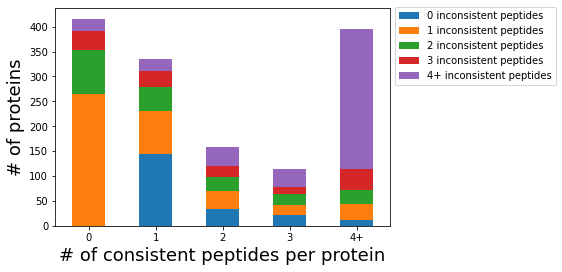

In [26]:
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
ax = plot4.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
# plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center')

ax.legend(bbox_to_anchor=(1., 1.03))

plt.xlabel('# of consistent peptides per protein', fontsize=18)
plt.ylabel('# of proteins', fontsize=18)
plt.savefig('stacked_bar_chart.png', dpi=600, bbox_inches = "tight")

plt.show()